# Lighthouse Problem

Commonly called the lighthouse problem. ThinkBayes calls it the Paintball problem. Let's describe the problem:

* Imagine a rectangular grid of locations - we will use the familiar x and y axes with origin (0,0) and top right corner at (30,50)
* Imagine that the x-axis is the shoreline lined with light detectors at integral points (1,2,3,...30) and there is a floating object somewhere in the rectangular grid at unknown location ($\alpha,\beta$) with a rotating light (like a lighthouse).
* If flashes of light were detected at shoreline locations 10, 15, 9, 19, what is the posterior probability of the location of the floating light source? 

The hypothesis is the location of the lightsource ($\alpha,\beta$)

The data is the observation of the light flashes along the shoreline at position x

The likelihood is the probability of observing a flash at position x given a known ($\alpha,\beta$) which can be derived using trigonometry and calculus:

$P(x|\alpha, \beta) \propto 1/\left(\frac{dx}{d\theta}\right)$

where $\theta$ is the angle of the light direction with the vertical line and

$ x-\alpha = \beta \tan \theta $, hence,

$ \frac{dx}{d\theta} = \frac{\beta}{\cos^2 \theta}, $ which is also called the strafing speed.

We can actually precompute the likelihood for all $x, \alpha, \beta$.

## References

* [ThinkBayes' Paintball Problem](http://www.greenteapress.com/thinkbayes/html/thinkbayes010.html)
* [The Lighthouse Problem](http://www.di.fc.ul.pt/~jpn/r/bugs/lighthouse.html)
* [Gull's Lighthouse](https://www.mjoldfield.com/atelier/2017/10/gulls-lighthouse.html)

In [22]:
import matplotlib
import numpy as np
import math
import seaborn as sns

%matplotlib inline

xmax = 31
ymax = 51

# initialize (x,alpha,beta) table for precomputing likelihood
like = np.ones((xmax,xmax,ymax))

def strafingSpeed(alpha, beta, x):
    theta = math.atan2(x - alpha, beta)
    speed = beta / math.cos(theta)**2
    # this is a hack to deal with limited precision, working with log is the correct solution
    if speed==0:
        #print(str(alpha)+","+str(beta)+","+str(x)+","+str(theta))
        speed=0.000001
    return speed

def precomputeLikelihood(like):
    for alpha in range(xmax):
        for beta in range(ymax):
            total=0.0
            for x in range(xmax):
                like[x,alpha,beta] = 1.0 / strafingSpeed(alpha, beta, x)
                total += like[x,alpha,beta]
            # normalize the likelihood to sum to one
            for x in range(xmax):
                like[x,alpha,beta] /= total

# likelihood function
def likelihood(data, alpha, beta):
    return like[data,alpha,beta]

# Bayesian update
def update(post,x):
    total = 0.0
    for alpha in range(xmax):
        for beta in range(ymax):
            post[alpha,beta] *= likelihood(x,alpha,beta)
            total += post[alpha,beta]
    # normalize the posterior (not strictly necessary)
    for alpha in range(xmax):
        for beta in range(ymax):
            post[alpha,beta] /= total

precomputeLikelihood(like)
print('Done precomputing likelihood.')


Done precomputing likelihood.


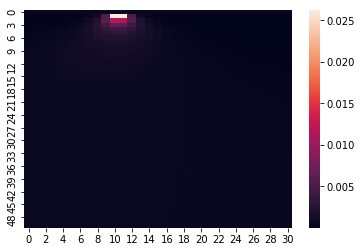

In [23]:
# initialize prior to uniform over the 2D grid
post = np.ones((xmax,ymax)) / xmax*ymax

update(post,10)
update(post,11)

ax = sns.heatmap(np.transpose(post))

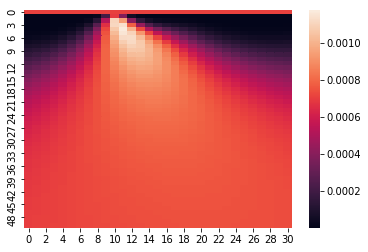

In [24]:
update(post,19)
update(post,29)
update(post,9)
ax = sns.heatmap(np.transpose(post))

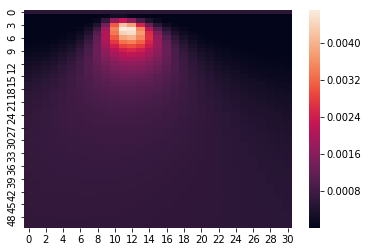

In [25]:
update(post,13)
update(post,15)
update(post,7)
ax = sns.heatmap(np.transpose(post))